# Analisis Sentimental a la Data de Starbucks + Clasificacion de valores en Variables Dummy

In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def process_sentiment_starbucks(input_filepath, output_filepath, output_dummy_filepath):
    # Cargar el archivo .parquet en un DataFrame de Pandas
    df_reviews = pd.read_parquet(input_filepath)
    
    # Eliminar las columnas 'review_id' y 'user_id'
    df_reviews.drop(columns=['review_id', 'user_id'], inplace=True)
    
    # Descargar el lexicón de VADER si no está disponible
    nltk.download('vader_lexicon')
    
    # Inicializar el analizador de sentimientos
    sia = SentimentIntensityAnalyzer()
    
    # Función para clasificar el sentimiento
    def classify_sentiment(text):
        scores = sia.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 2  # Positivo
        elif scores['compound'] <= -0.05:
            return 0  # Negativo
        else:
            return 1  # Neutral
    
    # Aplicar la función a la columna 'text'
    df_reviews['sentiment'] = df_reviews['text'].apply(classify_sentiment)
    
    # Guardar el DataFrame con los sentimientos clasificados como archivo Parquet
    df_reviews.to_parquet(output_filepath)
    
    # Crear variables dummy para los sentimientos
    df_reviews['positive'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 2 else 0)
    df_reviews['neutral'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 1 else 0)
    df_reviews['negative'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 0 else 0)
    
    # Eliminar la columna 'sentiment' si no se necesita
    df_reviews.drop(columns=['sentiment'], inplace=True)
    
    # Eliminar las columnas 'text' y 'date'
    df_reviews.drop(columns=['text', 'date'], inplace=True)
    
    # Crear columnas totales para positive, neutral y negative antes de agrupar
    df_reviews['positive_total'] = df_reviews.groupby('business_id')['positive'].transform('sum')
    df_reviews['neutral_total'] = df_reviews.groupby('business_id')['neutral'].transform('sum')
    df_reviews['negative_total'] = df_reviews.groupby('business_id')['negative'].transform('sum')
    
    # Agrupar por la columna 'business_id' y calcular el valor promedio de las columnas relevantes
    df_reviews_grouped = df_reviews.groupby('business_id').agg({
        'stars': 'mean',
        'useful': 'mean',
        'funny': 'mean',
        'cool': 'mean',
        'positive': 'mean',
        'neutral': 'mean',
        'negative': 'mean',
        'positive_total': 'sum',  # Sumar los valores totales
        'neutral_total': 'sum',   # Sumar los valores totales
        'negative_total': 'sum'   # Sumar los valores totales
    }).reset_index()
    
    # Guardar el DataFrame agrupado como archivo Parquet
    df_reviews_grouped.to_parquet(output_dummy_filepath)

In [6]:
# uso de la Funcion
input_filepath = '../gcp/reviews_starbucks.parquet'
output_filepath = '../gcp/reviews_starbucks_as.parquet'
output_dummy_filepath = '../gcp/reviews_starbucks_as_dummy.parquet'
process_sentiment_starbucks(input_filepath, output_filepath, output_dummy_filepath)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Analisis Sentimental a la Data de Dunkin + Clasificacion de valores en Variables Dummy

In [10]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def process_sentiment_dunkin(input_filepath, output_filepath, output_dummy_filepath):
    # Cargar el archivo .parquet en un DataFrame de Pandas
    df_reviews = pd.read_parquet(input_filepath)
    
    # Eliminar las columnas 'review_id' y 'user_id'
    df_reviews.drop(columns=['review_id', 'user_id'], inplace=True)
    
    # Descargar el lexicón de VADER si no está disponible
    nltk.download('vader_lexicon')
    
    # Inicializar el analizador de sentimientos
    sia = SentimentIntensityAnalyzer()
    
    # Función para clasificar el sentimiento
    def classify_sentiment(text):
        scores = sia.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 2  # Positivo
        elif scores['compound'] <= -0.05:
            return 0  # Negativo
        else:
            return 1  # Neutral
    
    # Aplicar la función a la columna 'text'
    df_reviews['sentiment'] = df_reviews['text'].apply(classify_sentiment)
    
    # Guardar el DataFrame con los sentimientos clasificados como archivo Parquet
    df_reviews.to_parquet(output_filepath)
    
    # Crear variables dummy para los sentimientos
    df_reviews['positive'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 2 else 0)
    df_reviews['neutral'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 1 else 0)
    df_reviews['negative'] = df_reviews['sentiment'].apply(lambda x: 1 if x == 0 else 0)
    
    # Eliminar la columna 'sentiment' si no se necesita
    df_reviews.drop(columns=['sentiment'], inplace=True)
    
    # Eliminar las columnas 'text' y 'date'
    df_reviews.drop(columns=['text', 'date'], inplace=True)
    
    # Crear columnas totales para positive, neutral y negative antes de agrupar
    df_reviews['positive_total'] = df_reviews.groupby('business_id')['positive'].transform('sum')
    df_reviews['neutral_total'] = df_reviews.groupby('business_id')['neutral'].transform('sum')
    df_reviews['negative_total'] = df_reviews.groupby('business_id')['negative'].transform('sum')
    
    # Agrupar por la columna 'business_id' y calcular el valor promedio de las columnas relevantes
    df_reviews_grouped = df_reviews.groupby('business_id').agg({
        'stars': 'mean',
        'useful': 'mean',
        'funny': 'mean',
        'cool': 'mean',
        'positive': 'mean',
        'neutral': 'mean',
        'negative': 'mean',
        'positive_total': 'sum',  # Sumar los valores totales
        'neutral_total': 'sum',   # Sumar los valores totales
        'negative_total': 'sum'   # Sumar los valores totales
    }).reset_index()
    
    # Guardar el DataFrame agrupado como archivo Parquet
    df_reviews_grouped.to_parquet(output_dummy_filepath)

In [13]:
# uso de la Funcion
input_filepath = '../gcp/reviews_dunkin.parquet'
output_filepath = '../gcp/review_dunkin_as.parquet'
output_dummy_filepath = '../gcp/reviews_dunkin_as_dummy.parquet'
process_sentiment_dunkin(input_filepath, output_filepath, output_dummy_filepath)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Estudios de relacion Starbucks Dunkin con el uso de distintos modelos de ML

## Análisis de Sentimientos, Starbucks vs Dunkin

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.express as px

# Descargar recursos de NLTK (si no los tienes descargados previamente)
nltk.download('vader_lexicon')

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cargar datos desde archivos Parquet de revisiones
df_reviews_starbucks = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_reviews_dunkin = pd.read_parquet('../gcp/reviews_dunkin.parquet')

# Unir datos de negocios y revisiones por business_id
df_starbucks = pd.merge(df_reviews_starbucks, df_business_starbucks, on='business_id')
df_dunkin = pd.merge(df_reviews_dunkin, df_business_dunkin, on='business_id')

# Función para analizar sentimientos utilizando NLTK Vader
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar análisis de sentimientos a cada revisión
df_starbucks['sentiment_score'] = df_starbucks['text'].apply(analyze_sentiment)
df_dunkin['sentiment_score'] = df_dunkin['text'].apply(analyze_sentiment)

# Agrupar por estado y calcular el promedio del sentimiento
starbucks_sentiment_by_state = df_starbucks.groupby('state')['sentiment_score'].mean().reset_index()
dunkin_sentiment_by_state = df_dunkin.groupby('state')['sentiment_score'].mean().reset_index()

# Visualización usando Plotly
fig = px.bar(starbucks_sentiment_by_state, x='state', y='sentiment_score', color='state',
             title='Sentimiento promedio de las revisiones de Starbucks por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Sentimiento promedio')
fig.show()

fig = px.bar(dunkin_sentiment_by_state, x='state', y='sentiment_score', color='state',
             title='Sentimiento promedio de las revisiones de Dunkin por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Sentimiento promedio')
fig.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Este código  proporciona una buena base para comenzar con el análisis de sentimientos de las revisiones de usuarios de Starbucks y Dunkin', y visualizar cómo se perciben estas marcas en diferentes ubicaciones geográficas. 

## Comparacion de métricas claves de rendimiento entre Starbucks y Dunkin' en distintos estados

In [4]:
import pandas as pd
import plotly.express as px

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cantidad de locales por estado
starbucks_locations = df_business_starbucks.groupby('state')['business_id'].count().reset_index()
starbucks_locations.columns = ['state', 'number_of_locations']

dunkin_locations = df_business_dunkin.groupby('state')['business_id'].count().reset_index()
dunkin_locations.columns = ['state', 'number_of_locations']

# Promedio de calificaciones por estado
starbucks_avg_stars = df_business_starbucks.groupby('state')['stars'].mean().reset_index()
starbucks_avg_stars.columns = ['state', 'average_stars']

dunkin_avg_stars = df_business_dunkin.groupby('state')['stars'].mean().reset_index()
dunkin_avg_stars.columns = ['state', 'average_stars']

# Cantidad de revisiones por estado
starbucks_review_count = df_business_starbucks.groupby('state')['review_count'].sum().reset_index()
starbucks_review_count.columns = ['state', 'total_reviews']

dunkin_review_count = df_business_dunkin.groupby('state')['review_count'].sum().reset_index()
dunkin_review_count.columns = ['state', 'total_reviews']

# Unir todos los DataFrames en uno solo para Starbucks y Dunkin'
starbucks_kpis = pd.merge(starbucks_locations, starbucks_avg_stars, on='state')
starbucks_kpis = pd.merge(starbucks_kpis, starbucks_review_count, on='state')
starbucks_kpis['brand'] = 'Starbucks'

dunkin_kpis = pd.merge(dunkin_locations, dunkin_avg_stars, on='state')
dunkin_kpis = pd.merge(dunkin_kpis, dunkin_review_count, on='state')
dunkin_kpis['brand'] = 'Dunkin'

# Combinar los KPIs de Starbucks y Dunkin en un solo DataFrame
kpis_combined = pd.concat([starbucks_kpis, dunkin_kpis], ignore_index=True)

# Visualización usando Plotly
fig = px.bar(kpis_combined, x='state', y='number_of_locations', color='brand', barmode='group',
             title='Cantidad de locales por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Cantidad de locales')
fig.show()

fig = px.bar(kpis_combined, x='state', y='average_stars', color='brand', barmode='group',
             title='Promedio de calificaciones por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Promedio de calificaciones')
fig.show()

fig = px.bar(kpis_combined, x='state', y='total_reviews', color='brand', barmode='group',
             title='Cantidad de reviews por estado')
fig.update_layout(xaxis_title='Estado', yaxis_title='Cantidad de revisiones')
fig.show()


Este enfoque proporciona una comparación clara de los KPIs entre Starbucks y Dunkin' en distintos estados.

## Predecir la calificación promedio de las tiendas utilizando características como el sentimiento de las Reviews y la ubicación geográfica (state)

Dado que no tenemos datos financieros, la predicción se centrará en la satisfacción del cliente.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Error cuadrático medio: 0.2616888671875


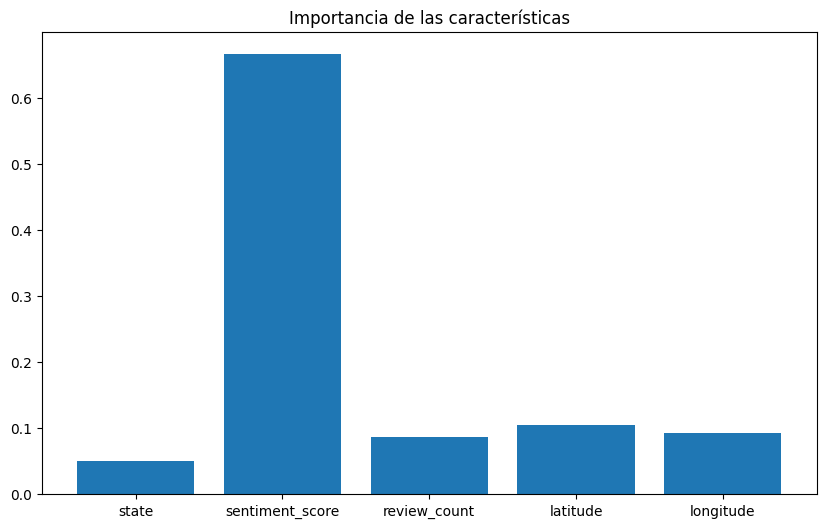

In [6]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Descargar recursos de NLTK (si no los tienes descargados previamente)
nltk.download('vader_lexicon')

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cargar datos desde archivos Parquet de revisiones
df_reviews_starbucks = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_reviews_dunkin = pd.read_parquet('../gcp/reviews_dunkin.parquet')

# Función para analizar sentimientos utilizando NLTK Vader
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar análisis de sentimientos a cada revisión
df_reviews_starbucks['sentiment_score'] = df_reviews_starbucks['text'].apply(analyze_sentiment)
df_reviews_dunkin['sentiment_score'] = df_reviews_dunkin['text'].apply(analyze_sentiment)

# Calcular el promedio del sentimiento por negocio
starbucks_sentiment_avg = df_reviews_starbucks.groupby('business_id')['sentiment_score'].mean().reset_index()
dunkin_sentiment_avg = df_reviews_dunkin.groupby('business_id')['sentiment_score'].mean().reset_index()

# Unir el promedio del sentimiento con los datos de negocios
df_business_starbucks = pd.merge(df_business_starbucks, starbucks_sentiment_avg, on='business_id', how='left')
df_business_dunkin = pd.merge(df_business_dunkin, dunkin_sentiment_avg, on='business_id', how='left')

# Concatenar los datos de Starbucks y Dunkin'
df_combined = pd.concat([df_business_starbucks, df_business_dunkin], ignore_index=True)

# Preprocesamiento de los datos
df_combined['state'] = df_combined['state'].astype('category').cat.codes  # Convertir 'state' a numérico

# Seleccionar solo columnas numéricas para rellenar valores nulos
numeric_columns = df_combined.select_dtypes(include=['number']).columns
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].mean())

# Características (features) y etiqueta (label)
X = df_combined[['state', 'sentiment_score', 'review_count', 'latitude', 'longitude']]
y = df_combined['stars']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

# Visualización de la importancia de las características
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.title('Importancia de las características')
plt.show()

El valor del error cuadrático medio (MSE) 0.2616888671875 es bastante bajo, lo que indica que el modelo está funcionando razonablemente bien para predecir las calificaciones promedio de las tienda

Este enfoque permite entender cómo ciertos factores (sentimiento de las revisiones, ubicación geográfica, etc.) afectan la calificación promedio de las tiendas de Starbucks y Dunkin'.

### Agregamos Más Características: Transformamos las categorías en variables dummies y las incluimos en el modelo, Usamos GridSearchCV para buscar los mejores hiperparámetros para los modelos de Random Forest, Gradient Boosting, y XGBoost, Evaluamos el rendimiento de diferentes modelos de regresión y comparamos sus errores cuadrados medios.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Random Forest - Mejor parámetro: {'max_depth': 10, 'n_estimators': 100}, Error cuadrático medio: 0.24349170299093037
Gradient Boosting - Mejor parámetro: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, Error cuadrático medio: 0.23072915557975615
XGBoost - Mejor parámetro: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, Error cuadrático medio: 0.2282315935100639


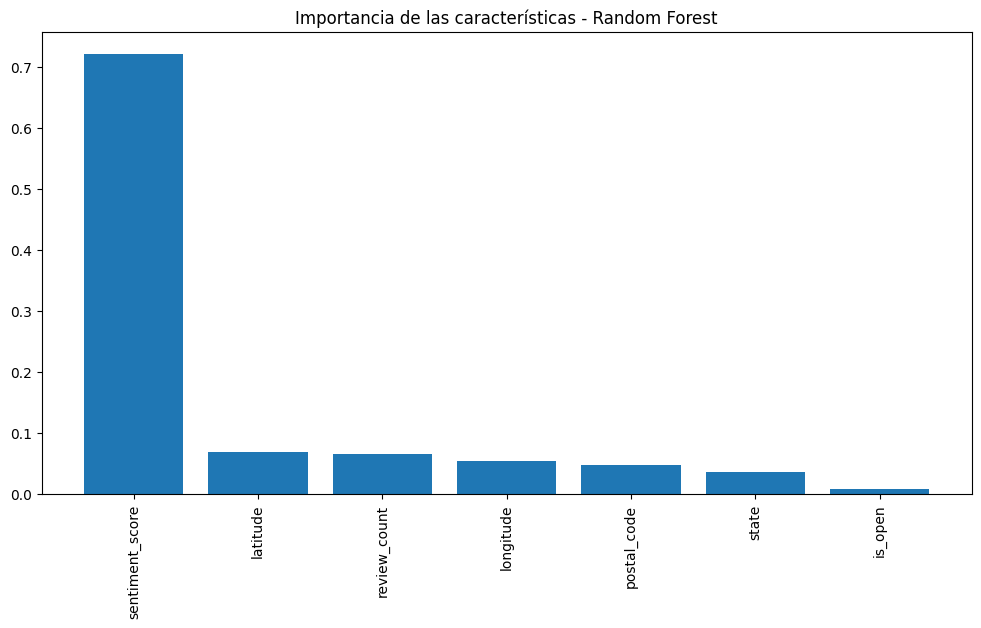

In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Descargar recursos de NLTK (si no los tienes descargados previamente)
nltk.download('vader_lexicon')

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Cargar datos desde archivos Parquet de revisiones
df_reviews_starbucks = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_reviews_dunkin = pd.read_parquet('../gcp/reviews_dunkin.parquet')

# Función para analizar sentimientos utilizando NLTK Vader
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']

# Aplicar análisis de sentimientos a cada revisión
df_reviews_starbucks['sentiment_score'] = df_reviews_starbucks['text'].apply(analyze_sentiment)
df_reviews_dunkin['sentiment_score'] = df_reviews_dunkin['text'].apply(analyze_sentiment)

# Calcular el promedio del sentimiento por negocio
starbucks_sentiment_avg = df_reviews_starbucks.groupby('business_id')['sentiment_score'].mean().reset_index()
dunkin_sentiment_avg = df_reviews_dunkin.groupby('business_id')['sentiment_score'].mean().reset_index()

# Unir el promedio del sentimiento con los datos de negocios
df_business_starbucks = pd.merge(df_business_starbucks, starbucks_sentiment_avg, on='business_id', how='left')
df_business_dunkin = pd.merge(df_business_dunkin, dunkin_sentiment_avg, on='business_id', how='left')

# Concatenar los datos de Starbucks y Dunkin'
df_combined = pd.concat([df_business_starbucks, df_business_dunkin], ignore_index=True)

# Preprocesamiento de los datos
df_combined['state'] = df_combined['state'].astype('category').cat.codes  # Convertir 'state' a numérico

# Convertir las categorías en variables dummies
df_combined = pd.get_dummies(df_combined, columns=['categories'], drop_first=True)

# Seleccionar solo columnas numéricas para rellenar valores nulos
numeric_columns = df_combined.select_dtypes(include=['number']).columns
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].mean())

# Características (features) y etiqueta (label)
X = df_combined.select_dtypes(include=[np.number]).drop(columns=['stars'])
y = df_combined['stars']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Parámetros para GridSearchCV
params = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Entrenar y evaluar los modelos
best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, params[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mejor parámetro: {grid.best_params_}, Error cuadrático medio: {mse}")

# Visualización de la importancia de las características para el mejor modelo (Random Forest)
best_rf = best_models['Random Forest']
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

El valor del error cuadrático medio (MSE) 0.2282315935100639 es mucho mas bajo, lo que indica que el modelo está funcionando razonablemente bien para predecir las calificaciones promedio de las tienda y es una clara mejora sobre el modelo anterior.

## Agrupación y Segmentación

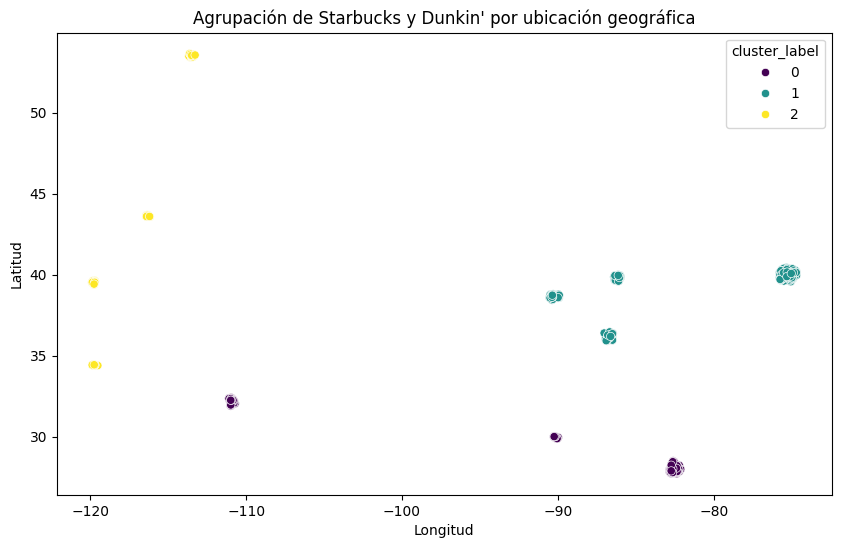

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde archivos Parquet de negocios
df_business_starbucks = pd.read_parquet('../gcp/business_starbucks.parquet')
df_business_dunkin = pd.read_parquet('../gcp/business_dunkin.parquet')

# Concatenar los datos de Starbucks y Dunkin'
df_combined = pd.concat([df_business_starbucks, df_business_dunkin], ignore_index=True)

# Preprocesamiento de los datos (ejemplo)
# Aquí se asume que se ha realizado el preprocesamiento necesario como en ejemplos anteriores

# Estandarización de las características relevantes para clustering
scaler = StandardScaler()
X_clustering = df_combined[['latitude', 'longitude']]
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Aplicación de K-Means para clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clustering_scaled)

# Asegurar que df_combined y kmeans.labels_ tengan la misma longitud
if len(df_combined) == len(kmeans.labels_):
    df_combined['cluster_label'] = kmeans.labels_
else:
    print("Error: Los tamaños de los datos no coinciden.")

# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster_label', data=df_combined, palette='viridis', legend='full')
plt.title('Agrupación de Starbucks y Dunkin\' por ubicación geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

## Análisis de Series Temporales

C:\Users\jhcat\AppData\Local\Temp\ipykernel_10776\456288097.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_combined = pd.merge(df_starbucks_daily, df_dunkin_daily, left_index=True, right_index=True, how='outer').fillna(method='ffill')


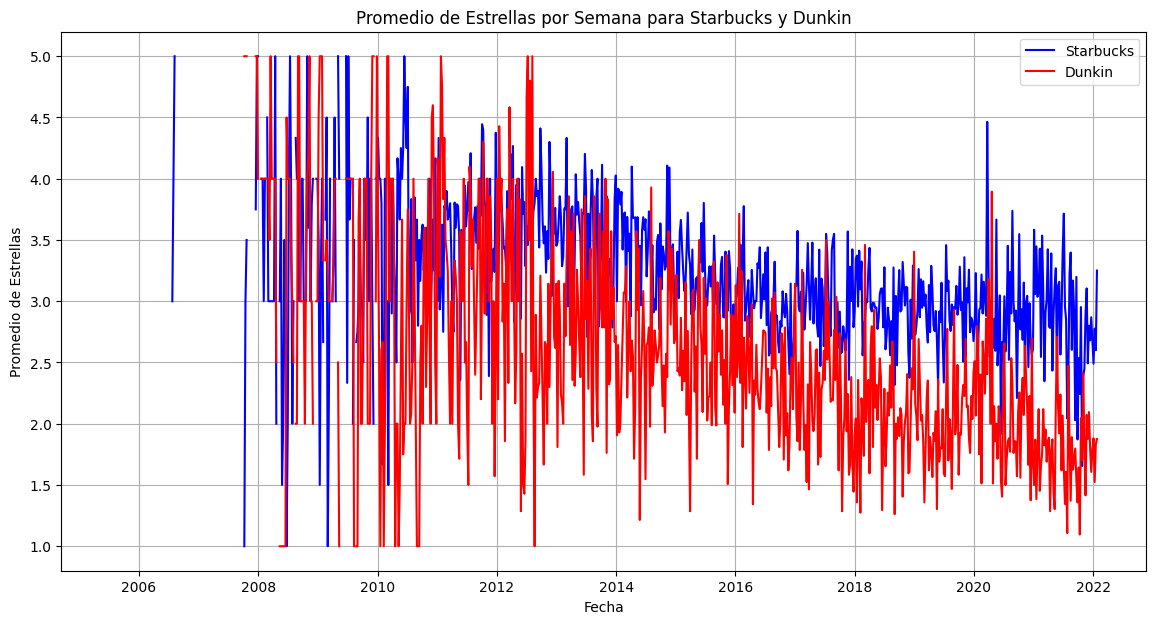

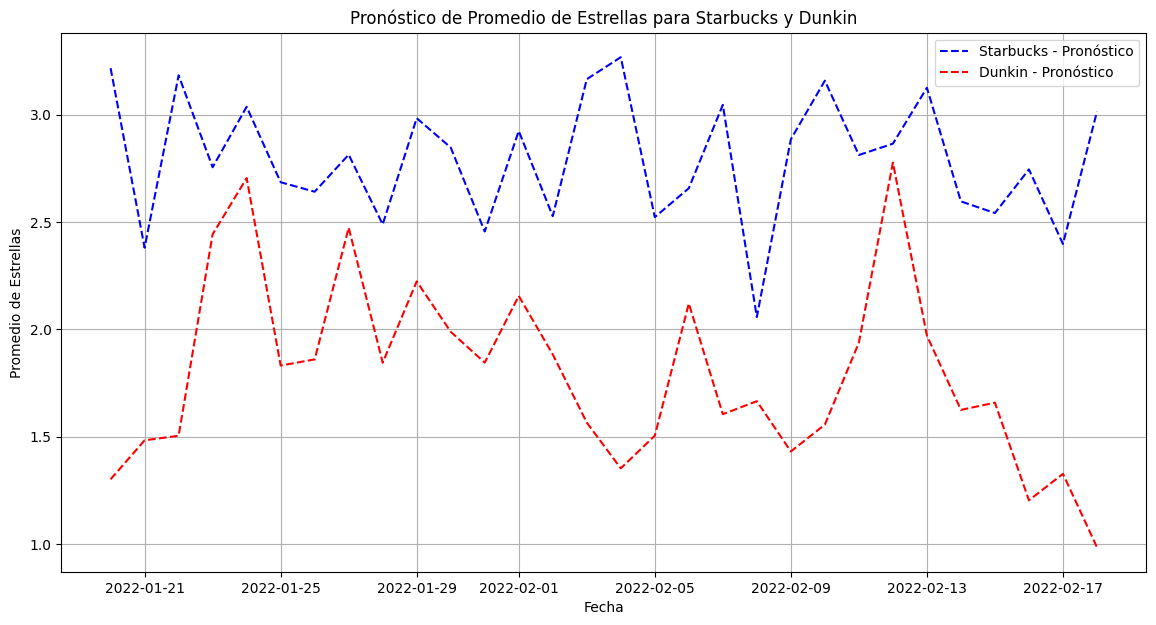

Mean Squared Error - Starbucks: 0.726692387973448
Mean Squared Error - Dunkin: 0.532782799393472


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Cargar datos
starbucks_path = '../gcp/reviews_starbucks.parquet'
dunkin_path = '../gcp/reviews_dunkin.parquet'

df_starbucks = pd.read_parquet(starbucks_path)
df_dunkin = pd.read_parquet(dunkin_path)

# Convertir columnas de fecha a datetime
df_starbucks['date'] = pd.to_datetime(df_starbucks['date'])
df_dunkin['date'] = pd.to_datetime(df_dunkin['date'])

# Filtrar y preparar datos
df_starbucks = df_starbucks[['date', 'stars']]
df_dunkin = df_dunkin[['date', 'stars']]

# Resamplear datos a diario, calculando la media de las estrellas
df_starbucks_daily = df_starbucks.groupby(df_starbucks['date'].dt.date).mean().rename(columns={'stars': 'avg_stars_starbucks'})
df_dunkin_daily = df_dunkin.groupby(df_dunkin['date'].dt.date).mean().rename(columns={'stars': 'avg_stars_dunkin'})

# Combinar datos de Starbucks y Dunkin'
df_combined = pd.merge(df_starbucks_daily, df_dunkin_daily, left_index=True, right_index=True, how='outer').fillna(method='ffill')

# Convertir el índice a DatetimeIndex
df_combined.index = pd.to_datetime(df_combined.index)

# Resamplear datos a semanal
df_combined_weekly = df_combined.resample('W-Mon').mean()

# Visualización de los datos semanales
plt.figure(figsize=(14, 7))
plt.plot(df_combined_weekly.index, df_combined_weekly['avg_stars_starbucks'], label='Starbucks', color='blue')
plt.plot(df_combined_weekly.index, df_combined_weekly['avg_stars_dunkin'], label='Dunkin', color='red')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas por Semana para Starbucks y Dunkin')
plt.legend()
plt.grid(True)
plt.show()

# Transformar la serie temporal para modelar
df_combined.index = pd.to_datetime(df_combined.index)
df_combined = df_combined.asfreq('D')

# Ajustar modelos de Holt-Winters para ambas marcas
def fit_holt_winters(df, column):
    endog = df[column].dropna().values  # Eliminar valores NaN y convertir a numpy array
    model = ExponentialSmoothing(endog, trend="add", seasonal="add", seasonal_periods=365).fit()
    return model

model_starbucks = fit_holt_winters(df_combined, 'avg_stars_starbucks')
model_dunkin = fit_holt_winters(df_combined, 'avg_stars_dunkin')

# Predecir para los próximos 30 días
forecast_starbucks = model_starbucks.forecast(steps=30)
forecast_dunkin = model_dunkin.forecast(steps=30)

# Visualización de los resultados
plt.figure(figsize=(14, 7))
#plt.plot(df_combined.index, df_combined['avg_stars_starbucks'], label='Starbucks - Datos Históricos', color='blue')
#plt.plot(df_combined.index, df_combined['avg_stars_dunkin'], label='Dunkin - Datos Históricos', color='red')
plt.plot(pd.date_range(df_combined.index[-1], periods=31, freq='D')[1:], forecast_starbucks, label='Starbucks - Pronóstico', linestyle='--', color='blue')
plt.plot(pd.date_range(df_combined.index[-1], periods=31, freq='D')[1:], forecast_dunkin, label='Dunkin - Pronóstico', linestyle='--', color='red')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Estrellas')
plt.title('Pronóstico de Promedio de Estrellas para Starbucks y Dunkin')
plt.legend()
plt.grid(True)
plt.show()

# Evaluación del modelo
mse_starbucks = mean_squared_error(df_combined['avg_stars_starbucks'][-30:], forecast_starbucks)
mse_dunkin = mean_squared_error(df_combined['avg_stars_dunkin'][-30:], forecast_dunkin)
print(f'Mean Squared Error - Starbucks: {mse_starbucks}')
print(f'Mean Squared Error - Dunkin: {mse_dunkin}')


En resumen, los MSE proporcionan una medida cuantitativa de la precisión de las predicciones del modelo de Holt-Winters para ambas marcas. A partir de estos resultados, podemos concluir que el modelo tiene una capacidad predictiva relativamente buena para ambos casos, aunque es importante considerar estos valores en el contexto del problema específico y compararlos con otros modelos o métodos de evaluación para una validación más completa.

# Estudios de relacion Starbucks con su distinta Data (user, business, reviews) con el uso de distintos modelos de ML

## Realizar el análisis de sentimiento de los reviews

In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Descargar los recursos necesarios para VADER
nltk.download('vader_lexicon')

# Cargar los datos
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')

# Función para análisis de sentimiento con VADER
def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Función para análisis de sentimiento con TextBlob
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aplicar las funciones a la columna de texto de los reviews
df_reviews['vader_sentiment'] = df_reviews['text'].apply(vader_sentiment)
df_reviews['textblob_sentiment'] = df_reviews['text'].apply(textblob_sentiment)

# Clasificación de sentimiento (positivo, negativo, neutral) usando VADER
def classify_sentiment_vader(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Clasificación de sentimiento (positivo, negativo, neutral) usando TextBlob
def classify_sentiment_textblob(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df_reviews['vader_sentiment_class'] = df_reviews['vader_sentiment'].apply(classify_sentiment_vader)
df_reviews['textblob_sentiment_class'] = df_reviews['textblob_sentiment'].apply(classify_sentiment_textblob)

# Mostrar algunos resultados
print(df_reviews[['text', 'vader_sentiment', 'textblob_sentiment', 'vader_sentiment_class', 'textblob_sentiment_class']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhcat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  vader_sentiment  \
0  Ordered Caramel frappe at Drive thru, BIG MIST...          -0.5307   
1  Drum-roll please! Review #100 coming right up!...           0.9863   
2  We stopped here for my Chai and Hubby's coffee...           0.7544   
3  There's been three times that I've ordered a g...           0.0000   
4  I went in when they had 4 people working, wait...          -0.8517   

   textblob_sentiment vader_sentiment_class textblob_sentiment_class  
0            0.000000              negative                  neutral  
1            0.145990              positive                 positive  
2            0.455556              positive                 positive  
3           -0.100000               neutral                 negative  
4           -0.429340              negative                 negative  


Este código dará una visión general de la percepción de los clientes sobre Starbucks a través de los reviews. Se puede ajustar los umbrales de clasificación de sentimiento según sea necesario y explorar más técnicas avanzadas como BERT para un análisis más profundo.

## Perfilado de usuarios - análisis de clusters, análisis de frecuencia de reviews

### Análisis de Clusters

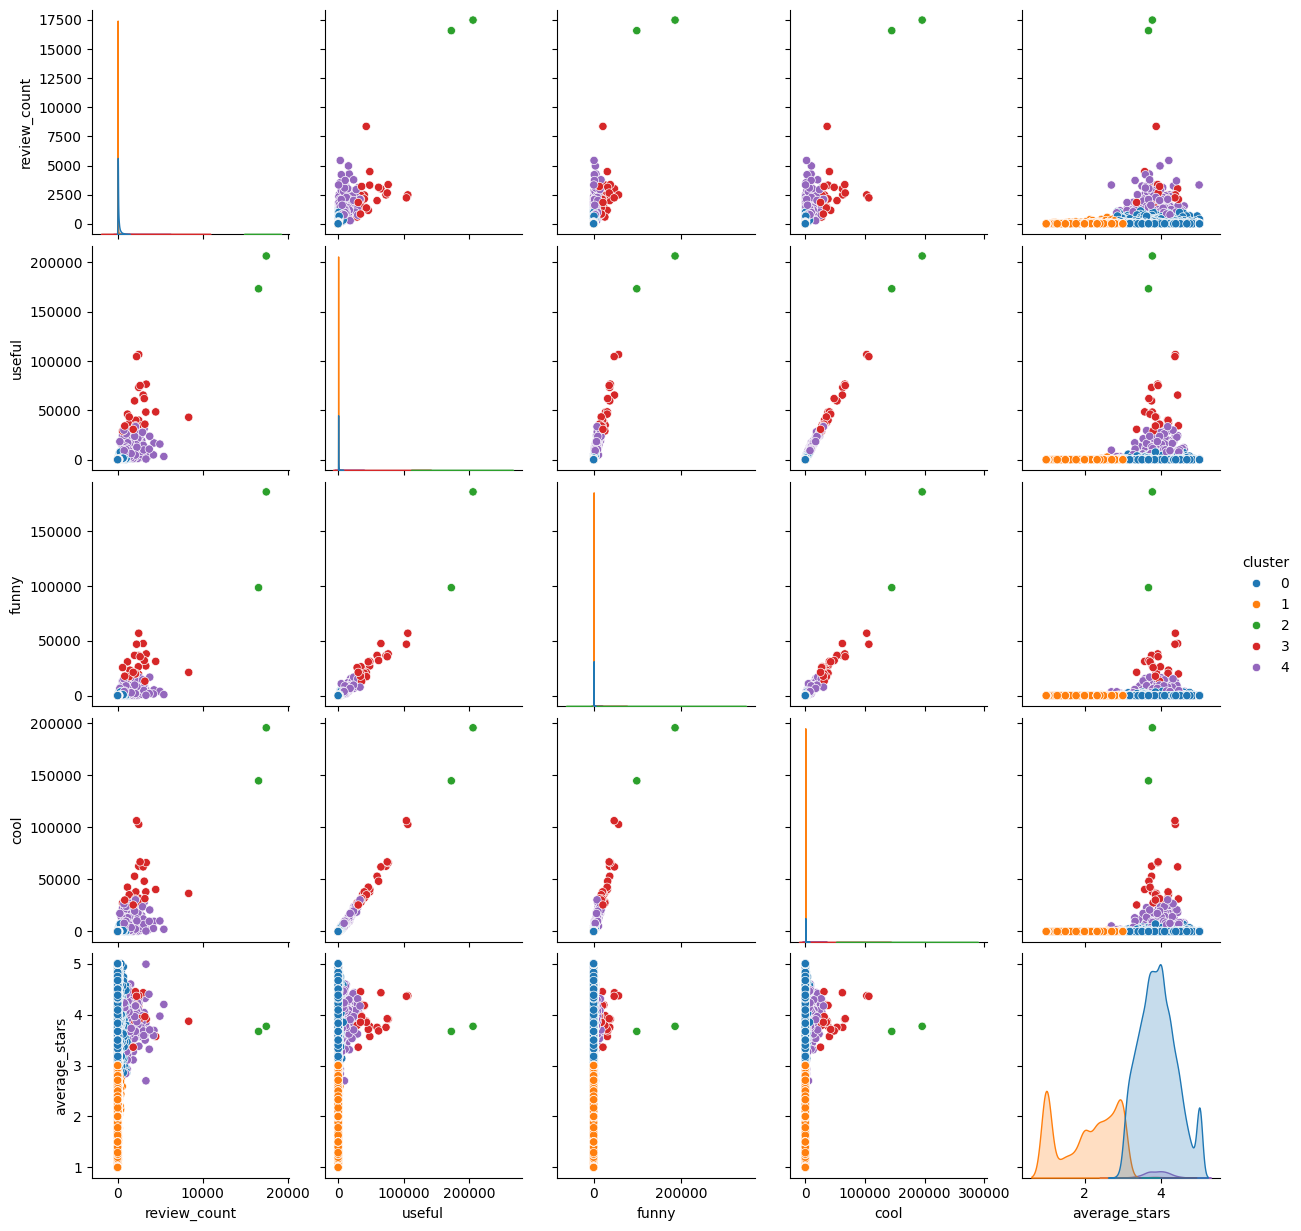

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df_users = pd.read_parquet('../gcp/user.parquet')

# Selección de características para clustering
features = ['review_count', 'useful', 'funny', 'cool', 'average_stars']
X = df_users[features]

# Normalización de las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df_users['cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de clusters
sns.pairplot(df_users, vars=features, hue='cluster', palette='tab10')
plt.show()

### Análisis de Frecuencia de Reviews

C:\Users\jhcat\AppData\Local\Temp\ipykernel_10776\1592290661.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_user_freq['review_freq_count'].fillna(0, inplace=True)


                  user_id     name  user_review_count  useful  funny   cool  \
0  x7YtLnBW2dUnrrpwaofVQQ  Ronskee                 37      56     29     29   
1  rppTTi-kfF8-qyiArNemag    Helen                460     700    149    425   
2  AkBtT43dYcttxQ3qOzPBAg   Sherri               1034    3066   1485   2235   
3  IpLRJY4CP3fXtlEd8Y4GFQ    Robyn                518    1325    450    348   
4  2l0O1EI1m0yWjFo2zSt71w    Shiho               2837   19237   9542  15235   

   average_stars  compliment_hot  compliment_more  compliment_profile  \
0           3.84              15                1                   0   
1           3.33              25               11                   2   
2           3.84             393               26                  24   
3           2.95              32                4                   2   
4           3.92            1018              108                  85   

   compliment_cute  compliment_list  compliment_note  compliment_plain  \
0           

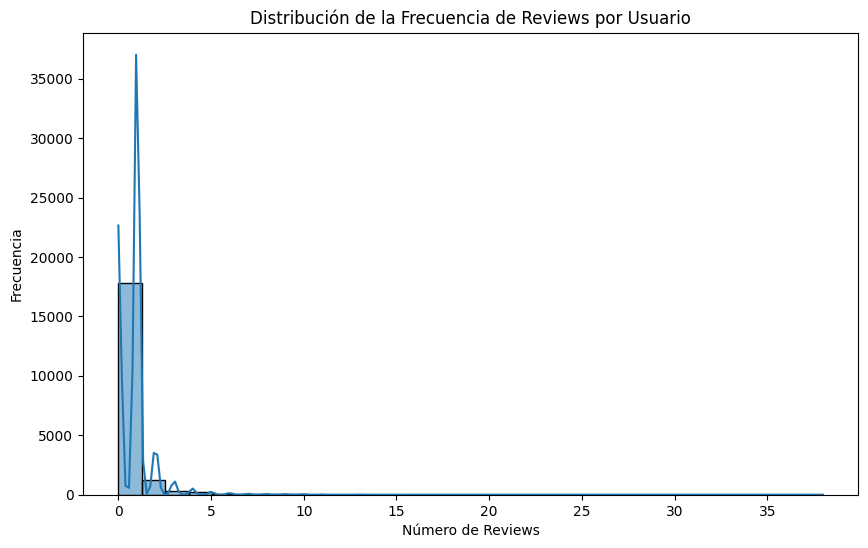

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df_users = pd.read_parquet('../gcp/user.parquet')
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')

# Contar la frecuencia de reviews por usuario
review_freq = df_reviews['user_id'].value_counts().reset_index()
review_freq.columns = ['user_id', 'review_count']

# Unir con los datos de usuarios
df_user_freq = df_users.merge(review_freq, on='user_id', how='left')

# Renombrar las columnas resultantes para evitar conflicto
df_user_freq.rename(columns={'review_count_x': 'user_review_count', 'review_count_y': 'review_freq_count'}, inplace=True)

# Manejar valores nulos (usuarios sin reviews)
df_user_freq['review_freq_count'].fillna(0, inplace=True)

# Mostrar las primeras filas para verificar
print(df_user_freq.head())

# Visualización de la distribución de la frecuencia de reviews
plt.figure(figsize=(10, 6))
sns.histplot(df_user_freq['review_freq_count'], bins=30, kde=True)
plt.xlabel('Número de Reviews')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Frecuencia de Reviews por Usuario')
plt.show()

## Predicción del rating del negocio basado en los reviews

### Código completo que incluye la ingeniería de características y la evaluación de modelos de regresión utilizando Regresión Lineal, Random Forest, Gradient Boosting y XGBoost:

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Cargar los datos de reviews y negocios
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_business = pd.read_parquet('../gcp/business_starbucks.parquet')

# Fusionar datos relevantes para la predicción del rating
df = df_reviews.merge(df_business, on='business_id', how='left')

# Ingeniería de Características
# Seleccionar características y objetivo
features = ['review_count', 'latitude', 'longitude']
target = 'stars_y'  # Utilizamos 'stars_y' que corresponde al rating del negocio

# Verificar si las columnas necesarias están presentes
if all(col in df.columns for col in features + [target]):
    X = df[features]
    y = df[target]
else:
    print(f"Las columnas {features + [target]} no están presentes en el DataFrame.")

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
print("Entrenando modelo de Regresión Lineal...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print(f"Error cuadrático medio (RMSE) de Regresión Lineal: {lr_rmse}")

# Modelo de Random Forest
print("Entrenando modelo de Random Forest...")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print(f"Error cuadrático medio (RMSE) de Random Forest: {rf_rmse}")

# Modelo de Gradient Boosting
print("Entrenando modelo de Gradient Boosting...")
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
print(f"Error cuadrático medio (RMSE) de Gradient Boosting: {gb_rmse}")

# Modelo de XGBoost
print("Entrenando modelo de XGBoost...")
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print(f"Error cuadrático medio (RMSE) de XGBoost: {xgb_rmse}")

Entrenando modelo de Regresión Lineal...


d:\Data Science\Curso Henry\DataPT08\LABs-PF\2do_sprint\Prueba_PF\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Error cuadrático medio (RMSE) de Regresión Lineal: 0.5609362026864941
Entrenando modelo de Random Forest...


d:\Data Science\Curso Henry\DataPT08\LABs-PF\2do_sprint\Prueba_PF\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Error cuadrático medio (RMSE) de Random Forest: 0.02001772264415101
Entrenando modelo de Gradient Boosting...


d:\Data Science\Curso Henry\DataPT08\LABs-PF\2do_sprint\Prueba_PF\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Error cuadrático medio (RMSE) de Gradient Boosting: 0.3941082751849573
Entrenando modelo de XGBoost...
Error cuadrático medio (RMSE) de XGBoost: 0.04708368291102185


d:\Data Science\Curso Henry\DataPT08\LABs-PF\2do_sprint\Prueba_PF\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Regresión Lineal: RMSE = 0.5609

Random Forest: RMSE = 0.0200

Gradient Boosting: RMSE = 0.3941

XGBoost: RMSE = 0.0471

Estos valores indican la magnitud promedio de los errores de predicción de cada modelo respecto al rating real de los negocios. Un RMSE más bajo indica un mejor rendimiento predictivo. En este caso, el modelo de Random Forest muestra el menor RMSE, seguido por XGBoost, Gradient Boosting y finalmente Regresión Lineal, que tiene el RMSE más alto.

## Análisis de lealtad de clientes

### Analisis de Series Temporales

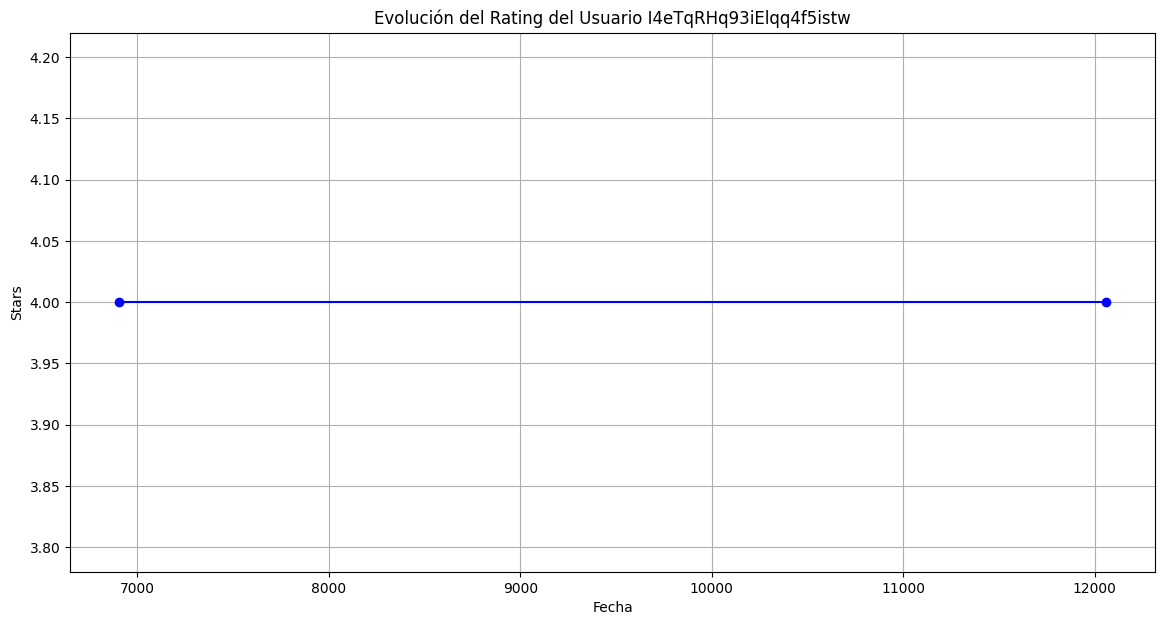

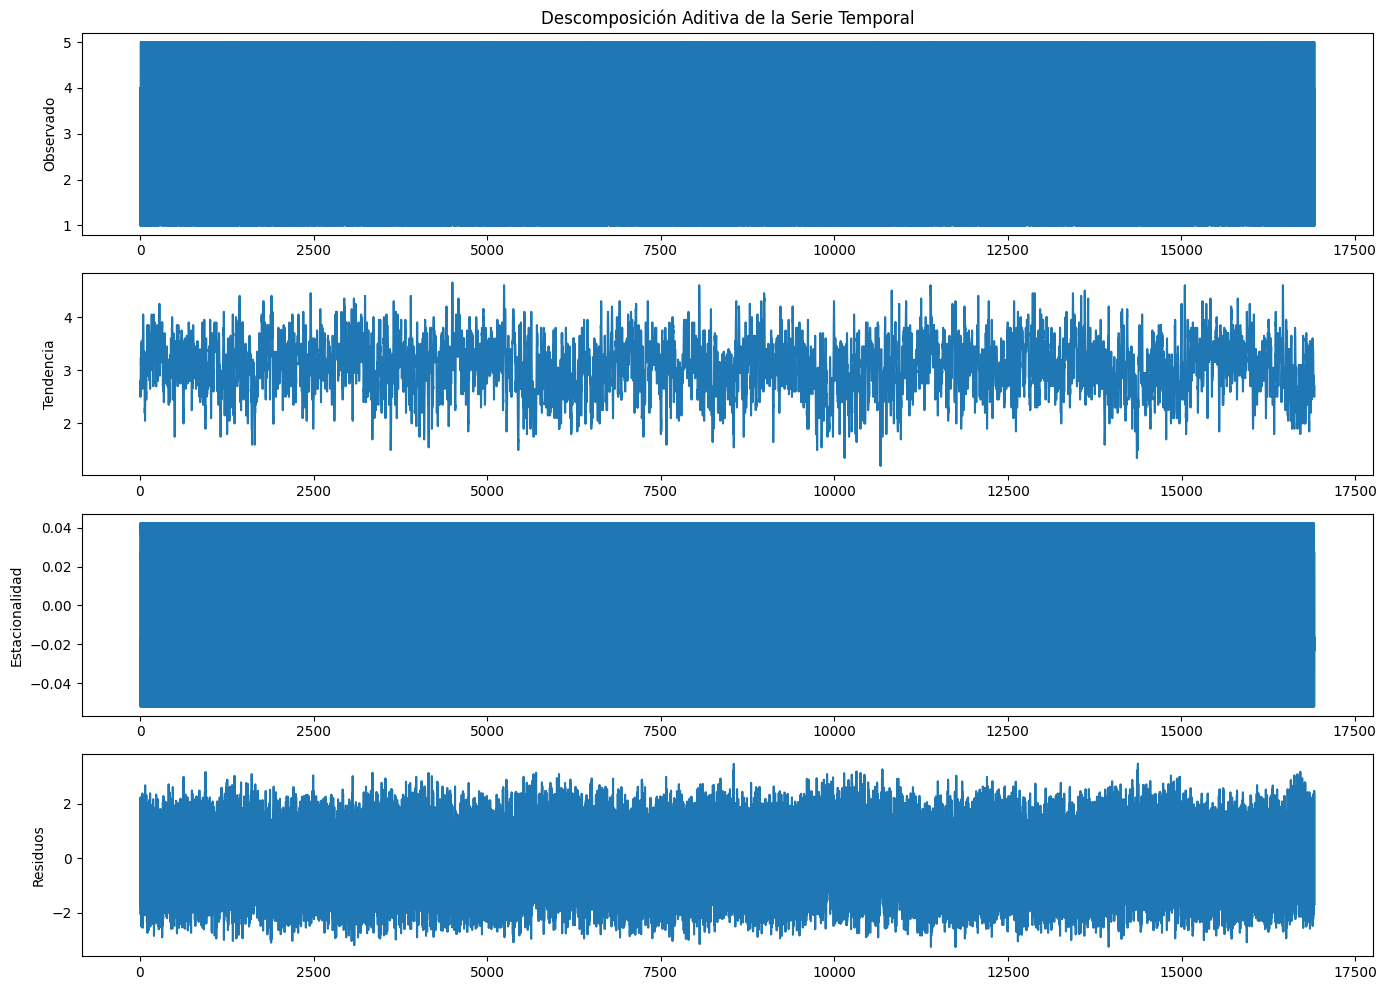

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Supongamos que tienes un DataFrame `df_reviews` con las columnas adecuadas (user_id, date, business_id, etc.)
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')

# Convertir la columna 'date' a tipo datetime si no está en ese formato
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Obtener un valor aleatorio de la columna 'user_id'
random_user_id = df_reviews['user_id'].sample().iloc[0]

# Filtrar las reseñas para el usuario aleatorio seleccionado
user_reviews = df_reviews[df_reviews['user_id'] == random_user_id]

# Ordenar los datos por fecha si no están ordenados
user_reviews = user_reviews.sort_values('date')

# Visualización rápida de los datos (opcional)
plt.figure(figsize=(14, 7))
plt.plot(user_reviews.index, user_reviews['stars'], marker='o', linestyle='-', color='b')
plt.title(f'Evolución del Rating del Usuario {random_user_id}')
plt.xlabel('Fecha')
plt.ylabel('Stars')
plt.grid(True)
plt.show()

# Descomposición estacional de la serie temporal
# Asumimos un periodo más corto, por ejemplo, 3 días
periodo_descomposicion = 10
result = seasonal_decompose(df_reviews['stars'], model='additive', period=periodo_descomposicion)

# Graficar la descomposición estacional
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
ax1.set_title('Descomposición Aditiva de la Serie Temporal')
result.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observado')
result.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Tendencia')
result.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Estacionalidad')
result.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residuos')
plt.tight_layout()
plt.show()

### Modelos de Supervivencia

Los modelos de supervivencia permiten analizar y predecir eventos que no ocurren en todos los sujetos y que dependen de múltiples factores observados y no observados.

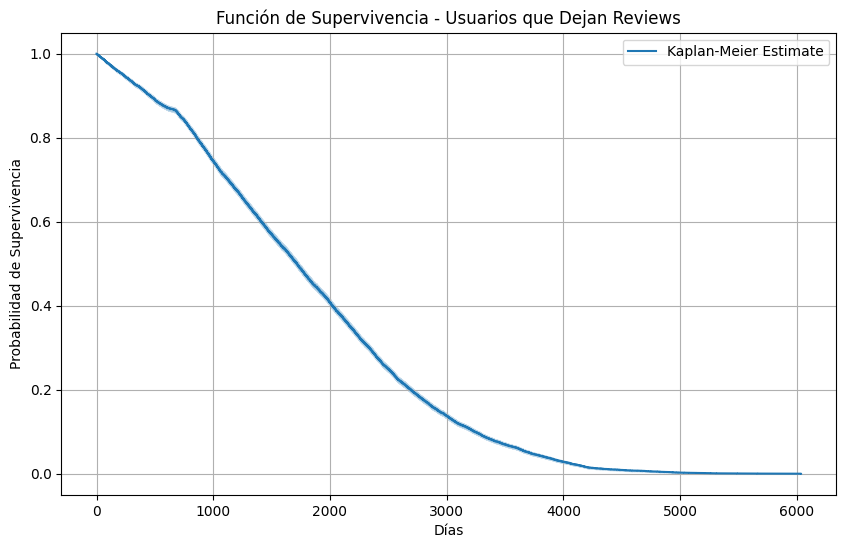

In [67]:
import pandas as pd
from lifelines import KaplanMeierFitter

# DataFrame df_reviews con las columnas adecuadas
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')
# Asumiendo que cada fila es un evento de un usuario dejando un review
# y queremos calcular la probabilidad de que un usuario deje de dejar reviews

# Convertir la columna 'date' a tipo datetime si no está en ese formato
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Ordenar por fecha para asegurar que los eventos estén en orden cronológico
df_reviews = df_reviews.sort_values(by='date')

# Crear un dataset de duración (time to event) y estado (censura)
# Asumimos que todos los usuarios están "activos" hasta la fecha del último registro
# Esto es una censura implícita.
durations = (df_reviews['date'].max() - df_reviews['date']).dt.days
event_observed = pd.Series([1] * len(df_reviews))  # Todos los usuarios tienen eventos observados (dejan reviews)

# Inicializar el modelo de Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustar el modelo
kmf.fit(durations, event_observed, label='Kaplan-Meier Estimate')

# Graficar la función de supervivencia
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Función de Supervivencia - Usuarios que Dejan Reviews')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.grid(True)
plt.show()

## Identificar los factores clave que impactan los ratings del negocio

### Usaremos técnicas como el análisis de importancia de características con modelos de árboles de decisión y Random Forest, así como el análisis de correlación entre las características y los ratings.

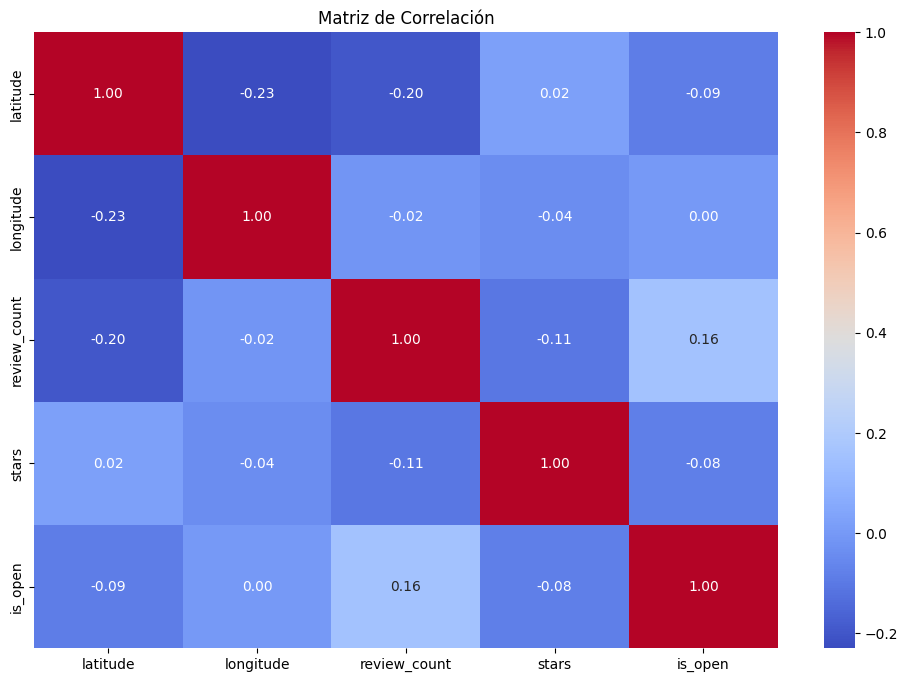

C:\Users\jhcat\AppData\Local\Temp\ipykernel_10776\2140112100.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


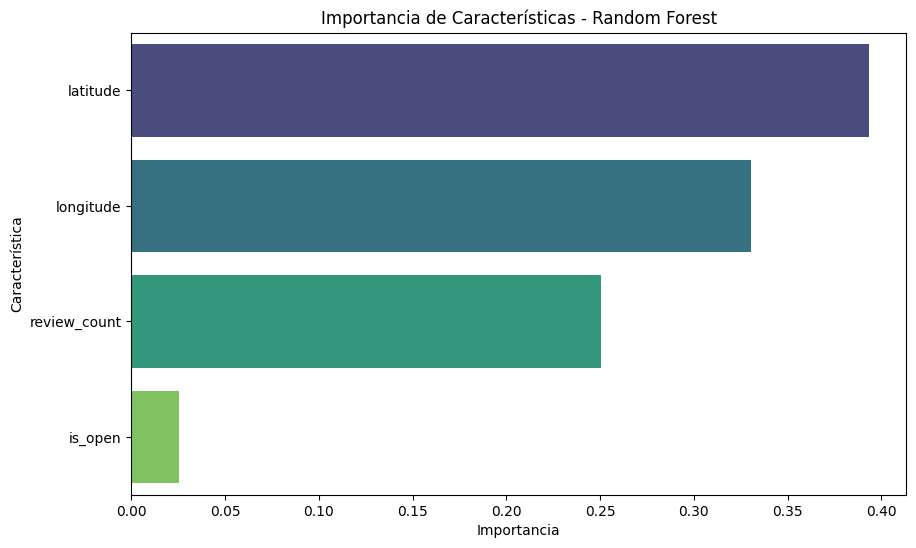

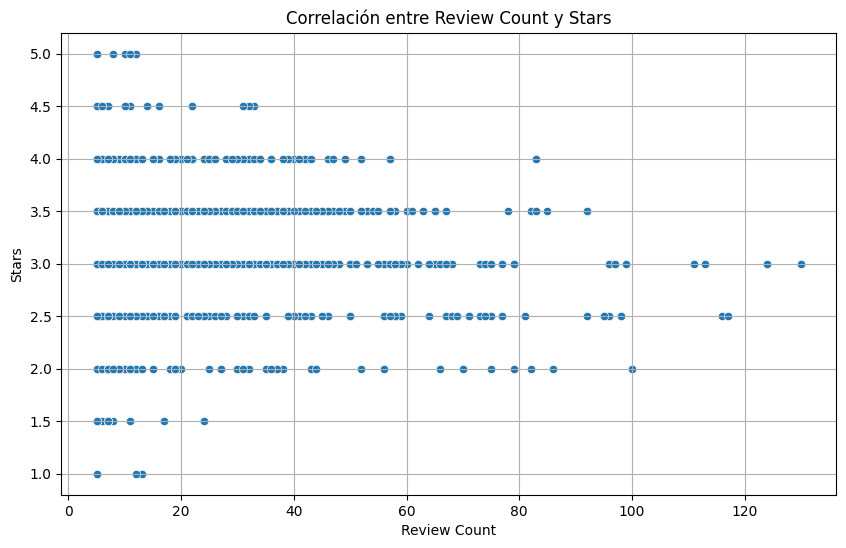

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# DataFrame df_business con las columnas adecuadas
df_business = pd.read_parquet('../gcp/business_starbucks.parquet')
# Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude',
#        'longitude', 'stars', 'review_count', 'is_open', 'categories', 'starbucks_id'],
#       dtype='object')

# Filtrar solo las columnas numéricas relevantes para el análisis
numeric_columns = ['latitude', 'longitude', 'review_count', 'stars', 'is_open']
df_numeric = df_business[numeric_columns]

# Calcular la matriz de correlación para las columnas numéricas
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()

# Dividir los datos en características (X) y el target (y)
features = ['latitude', 'longitude', 'review_count', 'is_open']
target = 'stars'

X = df_business[features]
y = df_business[target]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest para determinar la importancia de características
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener la importancia de características
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})\
                        .sort_values('Importance', ascending=False)

# Graficar la importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Importancia de Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# Análisis de correlación específico con el target 'stars'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='stars', data=df_business)
plt.title('Correlación entre Review Count y Stars')
plt.xlabel('Review Count')
plt.ylabel('Stars')
plt.grid(True)
plt.show()

Matriz de Correlación: Se calcula y visualiza la matriz de correlación entre las características numéricas seleccionadas y el target stars.

Modelo de Random Forest: Se entrena un modelo de RandomForestRegressor utilizando las características seleccionadas para determinar la importancia relativa de cada característica en la predicción de los ratings de negocios.

Visualización: Se utilizan gráficos para visualizar la matriz de correlación y la importancia de características, lo cual facilita la interpretación de los resultados.

## Recomendaciones de mejora para los negocios basadas en el análisis de reviews

Usar técnicas de análisis de sentimiento y modelado de tópicos. Además, realizaremos un análisis comparativo entre diferentes ubicaciones para identificar mejores prácticas

Tópico 0:
starbucks, coffee, friendly, location, staff, great, service, good, love, nice

Tópico 1:
drive, starbucks, location, line, time, order, parking, long, wait, inside

Tópico 2:
order, drink, starbucks, coffee, just, service, minutes, time, asked, said

Tópico 3:
starbucks, drink, coffee, order, like, just, time, don, location, milk

Tópico 4:
starbucks, place, seating, tables, coffee, nice, location, good, like, great



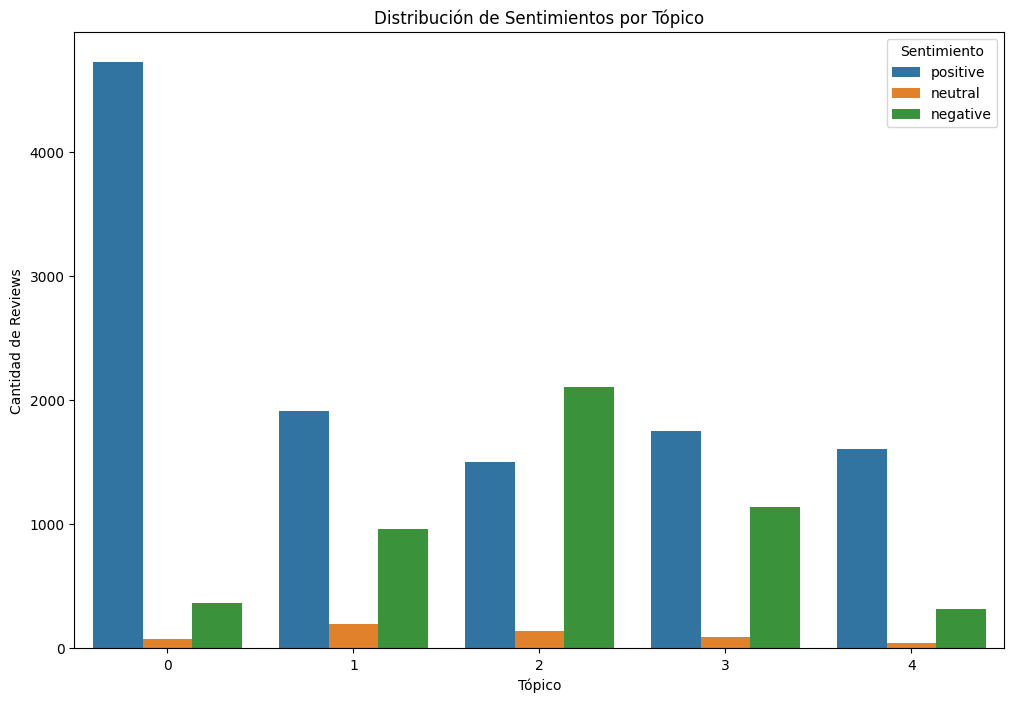

C:\Users\jhcat\AppData\Local\Temp\ipykernel_10776\92084575.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='stars', data=df_top_business, palette='viridis')


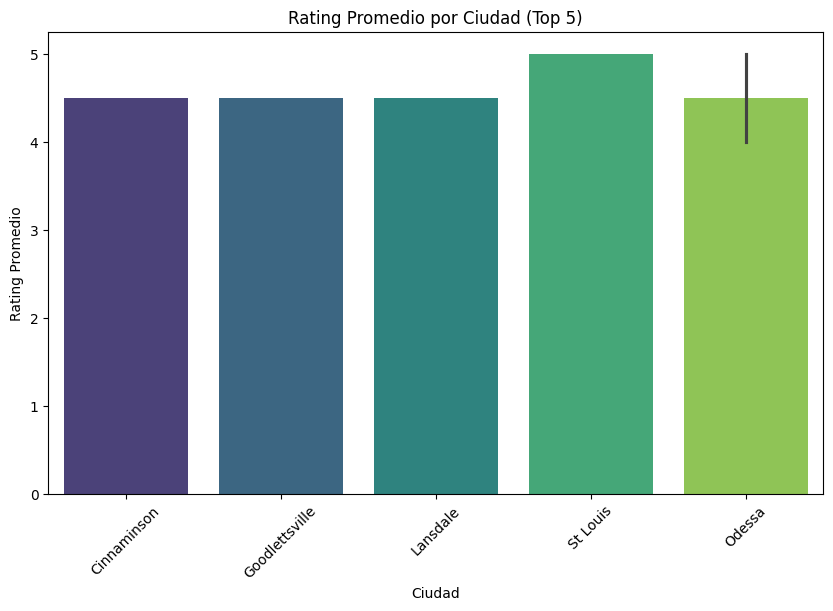

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Función para realizar análisis de sentimiento con NLTK Vader
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)['compound']
    if sentiment >= 0.05:
        return 'positive'
    elif sentiment <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Cargar los datos de reviews y negocios
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')
df_business = pd.read_parquet('../gcp/business_starbucks.parquet')

# Preprocesamiento y análisis de sentimiento en los reviews
df_reviews['sentiment'] = df_reviews['text'].apply(analyze_sentiment)

# Modelado de tópicos usando LDA en los reviews
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
reviews_text = vectorizer.fit_transform(df_reviews['text'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda_model.fit_transform(reviews_text)

# Asignar tópico dominante a cada review
df_reviews['dominant_topic'] = topics.argmax(axis=1)

# Obtener las palabras clave de cada tópico
feature_names = vectorizer.get_feature_names_out()

# Mostrar información detallada de cada tópico
num_top_words = 10  # Número de palabras clave más importantes por tópico a mostrar
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Tópico {topic_idx}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
    print()

# Análisis comparativo entre ubicaciones de negocios
mean_stars_by_location = df_business.groupby('city')['stars'].mean().sort_values(ascending=False)
top_cities = mean_stars_by_location.head(5).index.tolist()

# Filtrar reviews y negocios solo para las ubicaciones principales
df_top_reviews = df_reviews[df_reviews['business_id'].isin(df_business['business_id'])]  # Filtrar por business_id en df_business
df_top_business = df_business[df_business['city'].isin(top_cities)]

# Visualización de resultados
# Ejemplo: Gráfico de barras de la distribución de sentimientos por tópico
plt.figure(figsize=(12, 8))
sns.countplot(x='dominant_topic', hue='sentiment', data=df_reviews)
plt.title('Distribución de Sentimientos por Tópico')
plt.xlabel('Tópico')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Sentimiento', loc='upper right')
plt.show()

# Ejemplo: Análisis de rating promedio por ubicación
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='stars', data=df_top_business, palette='viridis')
plt.title('Rating Promedio por Ciudad (Top 5)')
plt.xlabel('Ciudad')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)
plt.show()

Obtención de Palabras Clave por Tópico: Después de ajustar el modelo LDA, se utiliza vectorizer.get_feature_names_out() para obtener las palabras clave que representan cada tópico identificado por el modelo.

Impresión de Información Detallada de Tópicos: Se itera sobre lda_model.components_ para cada tópico y se imprimen las palabras clave más importantes. Esto te permite comprender mejor qué temas o conceptos están representados por cada tópico.

## Detección de reviews falsos o manipulados

Usaremos técnicas de modelado de clasificación para identificar patrones anómalos en los reviews

Accuracy del modelo: 0.91
Matriz de Confusión:
[[3049    7]
 [ 285   43]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95      3056
        True       0.86      0.13      0.23       328

    accuracy                           0.91      3384
   macro avg       0.89      0.56      0.59      3384
weighted avg       0.91      0.91      0.88      3384



C:\Users\jhcat\AppData\Local\Temp\ipykernel_10776\1090992981.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


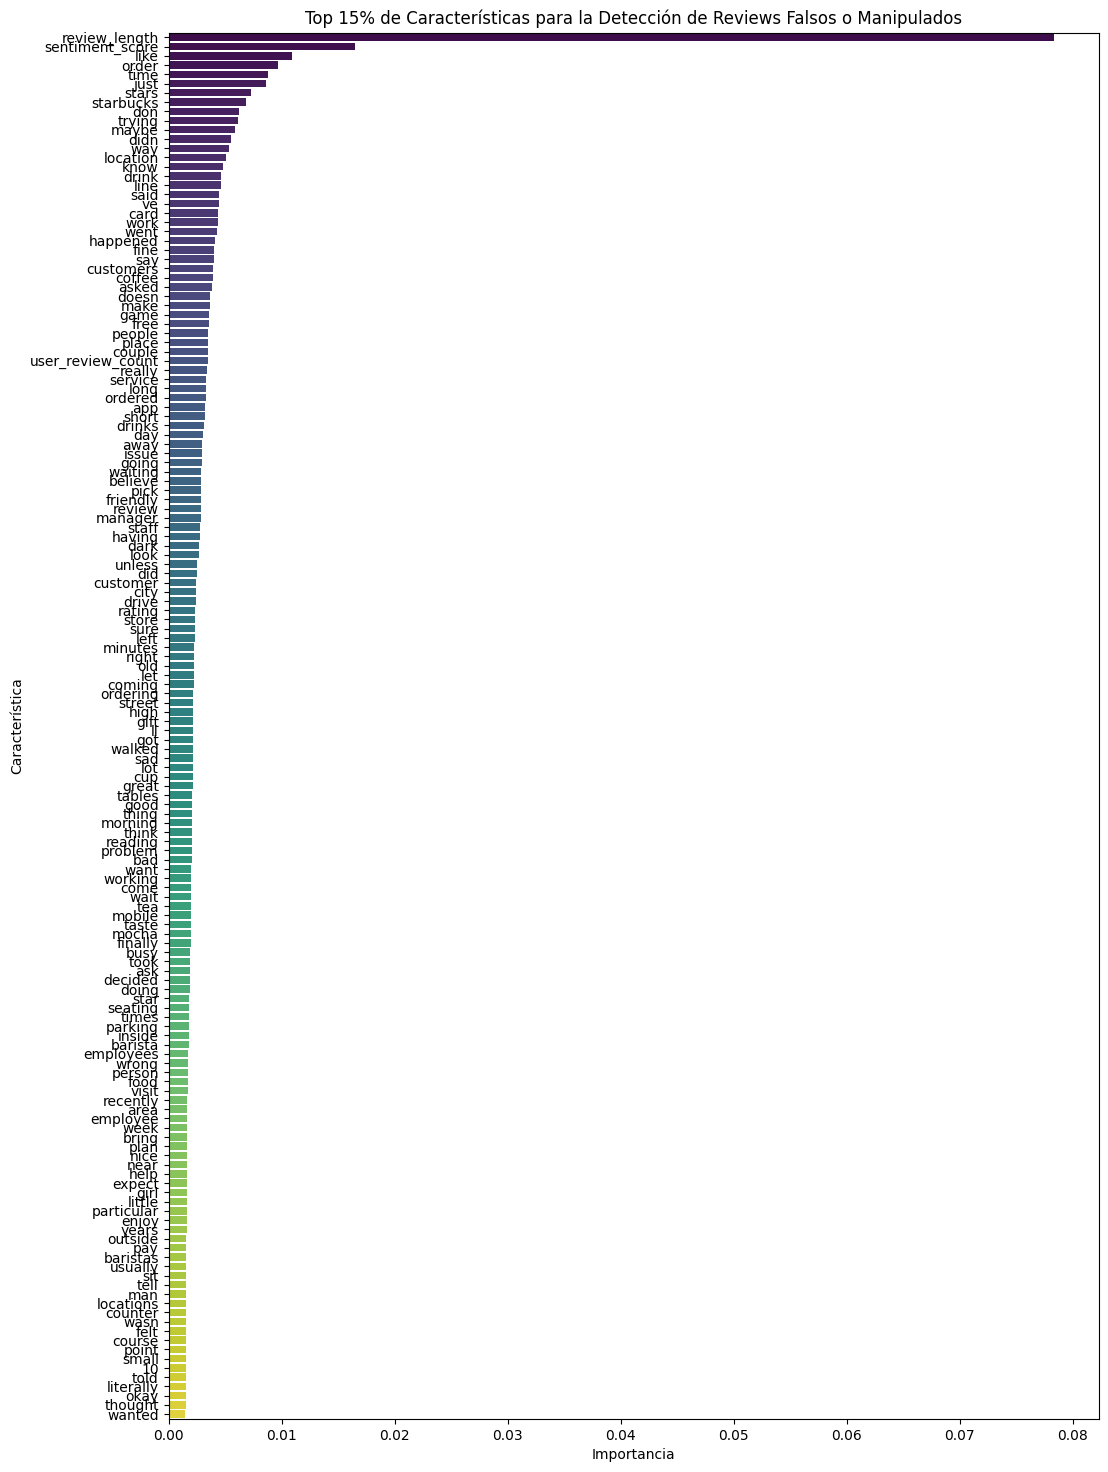

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Función para analizar el sentimiento del texto del review
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)['compound']
    return sentiment

# Cargar los datos de reviews y negocios
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')

# Preprocesamiento y análisis de sentimiento en los reviews
df_reviews['sentiment_score'] = df_reviews['text'].apply(analyze_sentiment)

# Creación de características adicionales
df_reviews['review_length'] = df_reviews['text'].apply(len)
df_reviews['user_review_count'] = df_reviews.groupby('user_id')['review_id'].transform('count')

# Feature engineering: TF-IDF de texto del review
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_features = tfidf_vectorizer.fit_transform(df_reviews['text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combinar características numéricas con TF-IDF
X = pd.concat([tfidf_df, df_reviews[['sentiment_score', 'review_length', 'user_review_count']]], axis=1)

# Detección de anomalías con Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df_reviews['is_fake_review'] = isolation_forest.fit_predict(X) == -1

# Definir la variable objetivo
y = df_reviews['is_fake_review']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de clasificación: Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(class_report)

# Análisis de características importantes
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Seleccionar el top 15% de las características más importantes
top_15_percent = int(len(sorted_importances) * 0.15)
top_features = sorted_importances.head(top_15_percent)

# Visualización
plt.figure(figsize=(12, 18))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 15% de Características para la Detección de Reviews Falsos o Manipulados')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

Desempeño General: El modelo tiene una alta exactitud (91%) y es muy efectivo para identificar reviews no falsos (precisión y recall altos para la clase "False").
Desafíos en la Identificación de Reviews Falsos: El modelo muestra un desempeño significativamente más bajo en la identificación de reviews falsos (bajo recall y F1-score para la clase "True"), lo que indica que muchas reviews falsos no están siendo detectados (alto número de FN).
Areas de Mejora: Se necesita mejorar el balanceo del dataset o ajustar el modelo para mejorar la detección de reviews falsos, quizás utilizando técnicas como el sobremuestreo de la clase minoritaria o el ajuste de umbrales de decisión.
Importancia de las Características: Aunque no se mencionan directamente en los resultados, la visualización de las características más importantes puede ofrecer insights sobre qué factores están influyendo más en la clasificación de los reviews como falsos o no falsos.